# Homework 2, Problem 4

The goal of this problem is for you to try and classify whether or not an individual is likely to make more or less than 50K per year.  Carry out this task.  Try at least five general architectures, report precision, recall and f1 score on a test set.

For each of the parts, report your preformance in terms not of just numbers but in terms of graphs. When you have training and validation data, please show the curves as the training progresses. You should know when you are overfitting or underfitting. Don't just report bare numbers. **You are free to add implmentation or markdown cells to make your notebook clearer!!**

## Data:

The following dataset was taken from the first dataset repository: http://archive.ics.uci.edu/ml/datasets/Adult

As the original task of the dataset lays out, 
Please note:
* the continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents.

## Part 1: Dealing with Missing Values

What should you do about dealing with missing values - do you just drop those rows?  
One of the most common problems we come accross in working with data "in the wild" is missing data. Often we will have observations (rows) that have only some of the needed attributes. Different rows will have different attributes missing. There are a number of strategies for dealing with the missing values. Clearly one could be dropping the column (attribute), or row (observation). Unfortuntely if you drop columns you may lose critical information that is helpful for classification and may be present in most (many) of the rows. You can drop rows but if many rows have at least one missing value, you may loose too much data. Do you try to impute (i. e. fill in) the missing data?  If so how?  

Explain why you chose the strategy you did.

*Hint - '?' denotes a missing value.*

### Some possible strategies for dealing with missing data

1. Whenever there is pleanty of data and very little missing data, you should consider dropping rows and/or columns. This may introduce some bias in the data but again, if the problem is limited to a very few rows or columns, it is easy in training to reproduce.

2. Fill with fixed value using sklearn.impute.SimpleImputer.
    a. 'constant' 0. Rarely a good idea but sometimes, if we can assume that when it is missing it is basically 0, this might be a good idea. For example a data may list number of house fires in a zip code and a missing value just means none.
    b. 'mean' if the data is numeric, the mean is meaningfull.
    c. 'median' may be more sensible if the data is integer or ordered. When the mean and median are very different it is important to understand what a "typical" example might mean. When considering "income", for example, a few large outliers will mess up the mean.
    d. "most_frequent' when you have categorical (nominal) labels, mean and median don't make any sense. Most probable label is what you need to use. This is also known as "mode".

3. sklearn.impute.MissingIndicator: Sometimes the fact that a value is missing, is itself an important indicator. One can create a new feature/attribute that indicates a certain attribute is missing. If you later build a classifier by hand you can explicitly wieght each variable using the missing variable weights so that for that example (row) that attribute won't contribute to the classifier. In a deep neural network it is possible that the network can learn to do that automatically.

4. One can use the sklearn.impute.KNNImputer which will look for rows to fill in the data.

5. Fill with sklearn.impute.IterativeImputer scikit-learn provides a sophisticated imputation strategy. You can read up on this in the documentation, but it will fix on of the columns (attributes), and try to use the other features to predict similar to KNN but more sophisticated.

6. Train a classifier: You can build your own classifier using machine learning. This is kind of a problem within a problem but if done correctly, it has the potential to be more accurate than a simpler method. Of course, if done badly it could be worse.

7. Manually impute the missing values. You may know enough about the problem to build an ad-hoc way to fill in the missing values for each column in a way that makes the most sense. This almost always requires a great deal of domain expertise. 



In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [0]:
# Add your code for filling in the data here. Please end by using the appropriate bandas method
# to show the amount of missing data (which in the end should not be any since you dropped or filled in data)




columns = [
    "age",
    "work_class",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "target"
]
df = pd.read_csv("adult.data", names=columns)
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = df[column].str.strip()

In [2]:
#df.info()
#df.head()

In [0]:
print(df.isin(['?']).any())
print(df[df.work_class == '?'].shape[0])
print(df[df.occupation == '?'].shape[0])
print(df[df.native_country == '?'].shape[0])

age               False
work_class         True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
target            False
dtype: bool
1836
1843
583


In [0]:
index = df[df.native_country == '?'].index
df.drop(index,inplace=True)

In [1]:
#df.info()
#print('work_class',df[df.work_class == '?'].shape[0])
#print('occupation',df[df.occupation == '?'].shape[0])
#print('native_country',df[df.native_country == '?'].shape[0])
#print('occupation count\n', df.occupation.value_counts())
#print('work_class count\n', df.work_class.value_counts())

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values='?', strategy='most_frequent')
df1 = pd.DataFrame(imp.fit_transform(df),
                   columns=df.columns,
                   index=df.index)


In [3]:
#print(df1[df1.work_class == '?'].shape[0])
#print(df1[df1.occupation == '?'].shape[0])
#print('occupation count\n', df1.occupation.value_counts().max())
#print('work_class count\n', df1.work_class.value_counts().max())

In [0]:
df.head()

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Part 2: Train Test Validate Split

Ideally you will split the data and use the train data filling in proceedure for the test data. Because this is expensive you can do experiments initially to see if this matters. Just keep carefully in mind what you will know and what you can't know during the test evaluation. Both sklearn and tensorflow provide facilities for train test split. Take your pick.

At the end of this you should have a train, validate and test split. In the next part you are going to do preliminary testing of your model with your train+validation sets to get some idea of good canditates for hyperparameters. Later you will merge your training and validation set and resplit them up using cross validation to get better estimates for setting hyper-parameters

**NOTE: It is very important that you record very carefully any parameters you have for filling in data in step 1. For example if you you build a "fit" using some training data, later you will need to use the this "fit" to transform the data, you can not re-fit on new data. In other words if your "pipline" in training takes the mean of the input to fill in the first column, you need to fill with exactly that number, when you get new data for testing. Don't take the mean of the test data.**

In [0]:
drop_cols = ['education_num','marital_status','relationship','race','sex','native_country']
df1 = df1.drop(drop_cols, axis=1)

In [0]:
print('work_class',len(df1.work_class.unique()))
print('occupation',len(df1.occupation.unique()))
df1.head()

work_class 8
occupation 14


,age,work_class,fnlwgt,education,occupation,capital_gain,capital_loss,hours_per_week,target
0,39,State-gov,77516,Bachelors,Adm-clerical,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,0,0,13,<=50K
2,38,Private,215646,HS-grad,Handlers-cleaners,0,0,40,<=50K
3,53,Private,234721,11th,Handlers-cleaners,0,0,40,<=50K
4,28,Private,338409,Bachelors,Prof-specialty,0,0,40,<=50K


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
df1['target']= le.fit_transform(df1['target'])
df1.head()

,age,work_class,fnlwgt,education,occupation,capital_gain,capital_loss,hours_per_week,target
0,39,State-gov,77516,Bachelors,Adm-clerical,2174,0,40,0
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,0,0,13,0
2,38,Private,215646,HS-grad,Handlers-cleaners,0,0,40,0
3,53,Private,234721,11th,Handlers-cleaners,0,0,40,0
4,28,Private,338409,Bachelors,Prof-specialty,0,0,40,0


In [0]:
df_final = pd.get_dummies(data=df1, columns=['work_class','education','occupation'])
df_final.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,target,work_class_Federal-gov,work_class_Local-gov,work_class_Never-worked,work_class_Private,work_class_Self-emp-inc,work_class_Self-emp-not-inc,work_class_State-gov,work_class_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,39,77516,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,83311,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,38,215646,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,53,234721,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,28,338409,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
X = df_final[['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week',
       'work_class_Federal-gov', 'work_class_Local-gov',
       'work_class_Never-worked', 'work_class_Private',
       'work_class_Self-emp-inc', 'work_class_Self-emp-not-inc',
       'work_class_State-gov', 'work_class_Without-pay', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving']]
y = df_final['target']

In [0]:
# Fill your solution for a train-test split in here.
X_train_val,X_test,y_train_val,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train_val,y_train_val, test_size=0.2, random_state=42)

In [0]:
y_train_val.shape

(25582,)

## Part 3: Build different 2 sklearn models and five different variations of Keras/tensorflow  models

Two simple models should be baseline from sklearn. Try a logistic regression and a random forest to know what your dense neural network should be able to beat. Use the training and validation data from above (don't look at the testing data). Try varations on the number of noDes in a layer, the number of layers. Also play with feature selection. You can try to eliminate featuers and see if your validation score goes up or down. See how the batch size effects things.

### At the end of this section provide a report with figures on your conclusion on how these things effected preformance:

* number of hidden layers
* number of nodes per hidden layer aka matrix dimension
* activation function
* weight initialization
* metrics for evaluation
* batch size
* number of epochs
* optimizer
* also carry out feature selection / dimensionality reduction
* does the model do better or worse with dimensionality reduction?

** Note: do not try regularization yet!*


In [0]:
def evaluate_classifier(clf,X_train, X_val,X_test, y_train, y_val, y_test):
    y_pred_val = clf.predict(X_val)
    y_pred_test = clf.predict(X_test)
    print("accuracy_score on validation set:",accuracy_score(y_val, y_pred_val))
    print("f1_score  on validation  set:", f1_score(y_val, y_pred_val))
    print("precision_score on validation  set:", precision_score(y_val, y_pred_val))
    print("recall_score on validation  set:", recall_score(y_val, y_pred_val))
    print("accuracy_score on test set:",accuracy_score(y_test, y_pred_test))
    print("f1_score  on test  set:", f1_score(y_test, y_pred_test))
    print("precision_score on test  set:", precision_score(y_val, y_pred_val))
    print("recall_score on test  set:", recall_score(y_val, y_pred_val))

In [0]:
# Get baseline results here with logisic regression and random forest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print('Logistic Regression')
evaluate_classifier(logreg,X_train,X_val,X_test,y_train,y_val,y_test)

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)
print('=============================================================')
print('Random Forest')
evaluate_classifier(rf,X_train,X_val,X_test,y_train,y_val,y_test)


Logistic Regression
accuracy_score on validation set: 0.802423294899355
f1_score  on validation  set: 0.38912386706948643
precision_score on validation  set: 0.7235955056179775
recall_score on validation  set: 0.26611570247933886
accuracy_score on test set: 0.7972170106316447
f1_score  on test  set: 0.3803153368370759
precision_score on test  set: 0.7235955056179775
recall_score on test  set: 0.26611570247933886
Random Forest
accuracy_score on validation set: 0.8248974008207934
f1_score  on validation  set: 0.5737392959086585
precision_score on validation  set: 0.6760089686098655
recall_score on validation  set: 0.4983471074380165
accuracy_score on test set: 0.8125390869293309
f1_score  on test  set: 0.54600530102234
precision_score on test  set: 0.6760089686098655
recall_score on test  set: 0.4983471074380165


In [0]:
X_train_nn = np.array(X_train_val)
y_train_oh = pd.get_dummies(data= y_train_val)
y_train_nn = np.array(y_train_oh)

In [0]:
X_test_nn = np.array(X_test)
X_val_nn = np.array(X_val)

y_test_nn = pd.get_dummies(data = y_test)
y_val_nn = pd.get_dummies(data = y_val)

In [0]:
X_train_nn1 = np.asarray(X_train_val).astype(np.float32)
y_train_nn1 = np.asarray(y_train_oh)

X_test_nn1 = np.asarray(X_test_nn).astype(np.float32)
y_test_nn1 = np.asarray(y_test_nn).astype(np.float32)

X_val_nn1 = np.asarray(X_val_nn).astype(np.float32)
y_val_nn1 = np.asarray(y_val_nn).astype(np.float32)

In [0]:
y_train_nn1= y_train_nn1.astype(np.float32)
y_train_nn1.shape

(25582, 2)

In [0]:
# Set up your models here
#from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten
import tensorflow as tf

metrics = [
    tf.keras.metrics.AUC(),
    tf.keras.metrics.Accuracy(),
    tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall()]

def model_one(X_train_nn1,y_train_nn1):
    model_1 = Sequential()
    model_1.add(Dense(100,input_dim=43,activation='relu'))
    model_1.add(Dense(2, activation='softmax'))
    model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics = metrics)
    history = model_1.fit(X_train_nn1,y_train_nn1, validation_split= 0.2,epochs = 5,batch_size = 10)
    print(history.history.keys())
    # summarize history for accuracy and loss
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='Training acc')
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    return model_1

def model_two(X_train_nn1,y_train_nn1):
    model_2 = Sequential()
    model_2.add(Dense(64,input_dim=43,activation='relu'))
    model_2.add(Flatten())
    model_2.add(Dense(2, activation='softmax'))
    model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics = metrics)
    history = model_2.fit(X_train_nn1,y_train_nn1, validation_split= 0.2,epochs = 5,batch_size = 10)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='Training acc')
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    return model_2


def model_three(X_train_nn1,y_train_nn1):
    model_3 = Sequential()
    model_3.add(Dense(64, input_dim=43, activation='relu'))
    model_3.add(Dropout(0.5))   
    model_3.add(Dense(2, activation='relu'))
    model_3.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics = ['accuracy'])
    history= model_3.fit(X_train_nn1,y_train_nn1,validation_split= 0.4, epochs = 7, batch_size = 32)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='Training acc')
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    return model_3

def model_four(X_train_nn1,y_train_nn1):
    model_4 = Sequential()
    model_4.add(Dense(100, input_dim=43, activation='relu'))
    model_4.add(Dense(32, activation='relu'))
    model_4.add(Dropout(0.5))
    model_4.add(Dense(2, activation='sigmoid'))
    model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    history= model_4.fit(X_train_nn1,y_train_nn1, epochs = 9, batch_size=10)
    acc = history.history['accuracy']
    loss = history.history['loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='Training acc')
    plt.plot(epochs, loss, label='Training loss')
    plt.title('Training acc and Training loss')
    plt.legend()
    plt.show()
    return model_4

def model_five(X_train_nn1,y_train_nn1):
    model_5 = Sequential()
    model_5.add(Dense(64, input_dim=43, activation='relu'))
    model_5.add(Dense(32, activation='relu'))
    model_5.add(Dense(16, activation='relu'))
    model_5.add(Dense(2, activation='sigmoid'))
    model_5.compile(loss='binary_crossentropy', optimizer='adam', metrics = metrics)
    history = model_5.fit(X_train_nn1,y_train_nn1, epochs=12, batch_size=10)
    acc = history.history['accuracy']
    loss = history.history['loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='Training acc')
    plt.plot(epochs, loss, label='Training loss')
    plt.title('Training acc and Training loss')
    plt.legend()
    plt.figure()
    plt.show()
    return model_5

Epoch 1/5
2047/2047 [==============================] - 4s 2ms/step - loss: 3.6755 - auc_1: 0.7605 - accuracy: 0.6082 - precision_1: 0.7610 - recall_1: 0.7610 - val_loss: 3.7496 - val_auc_1: 0.7555 - val_accuracy: 0.7555 - val_precision_1: 0.7555 - val_recall_1: 0.7555
Epoch 2/5
2047/2047 [==============================] - 4s 2ms/step - loss: 3.6752 - auc_1: 0.7604 - accuracy: 0.7604 - precision_1: 0.7604 - recall_1: 0.7604 - val_loss: 3.7496 - val_auc_1: 0.7555 - val_accuracy: 0.7555 - val_precision_1: 0.7555 - val_recall_1: 0.7555
Epoch 3/5
2047/2047 [==============================] - 4s 2ms/step - loss: 3.6752 - auc_1: 0.7604 - accuracy: 0.7604 - precision_1: 0.7604 - recall_1: 0.7604 - val_loss: 3.7496 - val_auc_1: 0.7555 - val_accuracy: 0.7555 - val_precision_1: 0.7555 - val_recall_1: 0.7555
Epoch 4/5
2047/2047 [==============================] - 4s 2ms/step - loss: 3.6752 - auc_1: 0.7604 - accuracy: 0.7604 - precision_1: 0.7604 - recall_1: 0.7604 - val_loss: 3.7496 - val_auc_1: 0.7

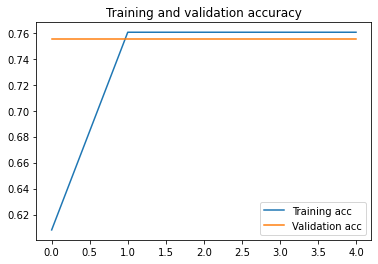

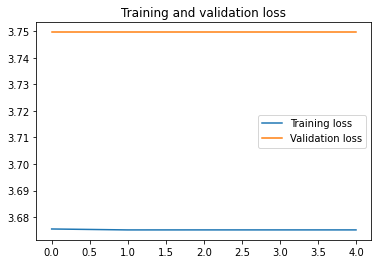

320/320 [==============================] - 0s 1ms/step - loss: 3.6267 - auc_1: 0.7635 - accuracy: 0.7635 - precision_1: 0.7635 - recall_1: 0.7635


[3.626711845397949,
 0.763533353805542,
 0.7635332942008972,
 0.7635332942008972,
 0.7635332942008972]

In [0]:
model1 = model_one(X_train_nn1,y_train_nn1)
model1.evaluate(X_val_nn1,y_val_nn1, batch_size=16)
#print(model1.evaluate(X_test_nn1,y_test_nn1))
#model1.summary()

Model 1 has very good accuracy but loss is alos too high

Epoch 1/5
2047/2047 [==============================] - 4s 2ms/step - loss: 11.6619 - auc_1: 0.3444 - accuracy: 0.3444 - precision_1: 0.3444 - recall_1: 0.3444 - val_loss: 11.5875 - val_auc_1: 0.2445 - val_accuracy: 0.2445 - val_precision_1: 0.2445 - val_recall_1: 0.2445
Epoch 2/5
2047/2047 [==============================] - 4s 2ms/step - loss: 11.6619 - auc_1: 0.2396 - accuracy: 0.2396 - precision_1: 0.2396 - recall_1: 0.2396 - val_loss: 11.5875 - val_auc_1: 0.2445 - val_accuracy: 0.2445 - val_precision_1: 0.2445 - val_recall_1: 0.2445
Epoch 3/5
2047/2047 [==============================] - 4s 2ms/step - loss: 11.6619 - auc_1: 0.2396 - accuracy: 0.2396 - precision_1: 0.2396 - recall_1: 0.2396 - val_loss: 11.5875 - val_auc_1: 0.2445 - val_accuracy: 0.2445 - val_precision_1: 0.2445 - val_recall_1: 0.2445
Epoch 4/5
2047/2047 [==============================] - 4s 2ms/step - loss: 11.6619 - auc_1: 0.2396 - accuracy: 0.2396 - precision_1: 0.2396 - recall_1: 0.2396 - val_loss: 11.5875 - val_au

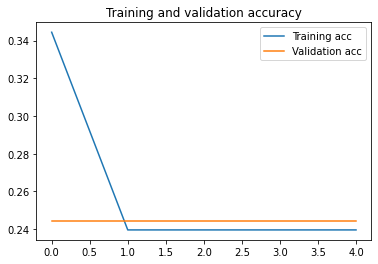

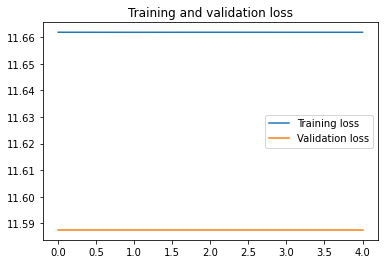

320/320 [==============================] - 0s 1ms/step - loss: 11.7104 - auc_1: 0.2365 - accuracy: 0.2365 - precision_1: 0.2365 - recall_1: 0.2365


[11.710391998291016,
 0.2364666759967804,
 0.2364666759967804,
 0.2364666759967804,
 0.2364666759967804]

In [0]:
# model 2
model2 = model_two(X_train_nn1,y_train_nn1)
model2.evaluate(X_val_nn1,y_val_nn1,batch_size=16)
#print(model2.evaluate(X_test_nn1,y_test_nn1))


model 2 has really perforemed very bad high loss and loss accuracy

Epoch 1/7
480/480 [==============================] - 1s 2ms/step - loss: 10.0314 - accuracy: 0.2922 - val_loss: 11.6551 - val_accuracy: 0.2422
Epoch 2/7
480/480 [==============================] - 1s 2ms/step - loss: 9.9747 - accuracy: 0.2986 - val_loss: 11.6633 - val_accuracy: 0.2422
Epoch 3/7
480/480 [==============================] - 1s 2ms/step - loss: 9.9017 - accuracy: 0.2970 - val_loss: 11.6633 - val_accuracy: 0.2422
Epoch 4/7
480/480 [==============================] - 1s 2ms/step - loss: 9.8299 - accuracy: 0.3017 - val_loss: 11.6633 - val_accuracy: 0.2422
Epoch 5/7
480/480 [==============================] - 1s 2ms/step - loss: 9.9020 - accuracy: 0.2944 - val_loss: 11.6633 - val_accuracy: 0.2422
Epoch 6/7
480/480 [==============================] - 1s 2ms/step - loss: 9.9291 - accuracy: 0.2967 - val_loss: 11.6633 - val_accuracy: 0.2422
Epoch 7/7
480/480 [==============================] - 1s 2ms/step - loss: 9.8679 - accuracy: 0.2990 - val_loss: 11.6633 - val_accuracy: 0.2422


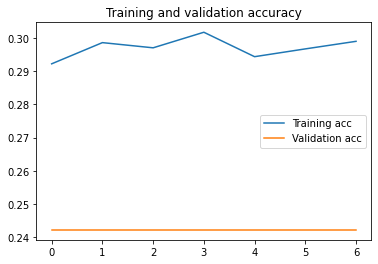

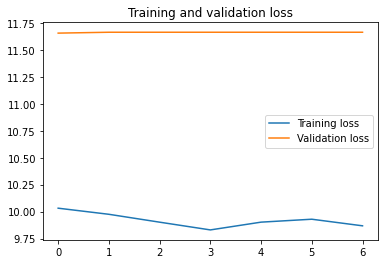

214/214 [==============================] - 0s 1ms/step - loss: 11.7461 - accuracy: 0.2365


[11.746127128601074, 0.2364666759967804]

In [0]:
#model3
model3 = model_three(X_train_nn1,y_train_nn1)
model3.evaluate(X_val_nn1,y_val_nn1, batch_size=24)
#model3.summary()
#print(model3.evaluate(X_test_nn1,y_test_nn1))

In model 3 train data has perforemed well but the validation data is very bad may it is confused with new dataset 

Epoch 1/9
2559/2559 [==============================] - 4s 1ms/step - loss: 112.4925 - accuracy: 0.7598
Epoch 2/9
2559/2559 [==============================] - 4s 1ms/step - loss: 0.6888 - accuracy: 0.7643
Epoch 3/9
2559/2559 [==============================] - 4s 1ms/step - loss: 0.5601 - accuracy: 0.7624
Epoch 4/9
2559/2559 [==============================] - 4s 1ms/step - loss: 0.6442 - accuracy: 0.7605
Epoch 5/9
2559/2559 [==============================] - 4s 2ms/step - loss: 0.5503 - accuracy: 0.7605
Epoch 6/9
2559/2559 [==============================] - 4s 1ms/step - loss: 0.5507 - accuracy: 0.7602
Epoch 7/9
2559/2559 [==============================] - 4s 1ms/step - loss: 0.5508 - accuracy: 0.7601
Epoch 8/9
2559/2559 [==============================] - 4s 1ms/step - loss: 0.5506 - accuracy: 0.7603
Epoch 9/9
2559/2559 [==============================] - 4s 2ms/step - loss: 0.5504 - accuracy: 0.7604


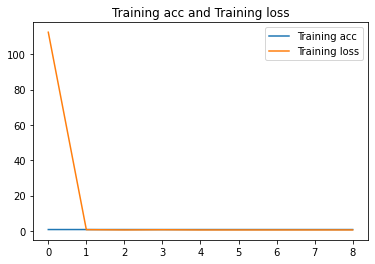

160/160 [==============================] - 0s 1ms/step - loss: 0.5448 - accuracy: 0.7651
[0.5447905659675598, 0.7650967240333557]


In [0]:
model4 = model_four(X_train_nn1,y_train_nn1)
print(model4.evaluate(X_val_nn1,y_val_nn1))
#model4.summary()
#print(model4.evaluate(X_test_nn1,y_test_nn1))

Epoch 1/12
2559/2559 [==============================] - 4s 2ms/step - loss: 100.3020 - auc_1: 0.6079 - accuracy: 0.5271 - precision_1: 0.6066 - recall_1: 0.6053
Epoch 2/12
2559/2559 [==============================] - 4s 2ms/step - loss: 29.4647 - auc_1: 0.6899 - accuracy: 0.4691 - precision_1: 0.6816 - recall_1: 0.6788
Epoch 3/12
2559/2559 [==============================] - 4s 2ms/step - loss: 4.2405 - auc_1: 0.7137 - accuracy: 0.1133 - precision_1: 0.7227 - recall_1: 0.7274
Epoch 4/12
2559/2559 [==============================] - 4s 2ms/step - loss: 0.5541 - auc_1: 0.7653 - accuracy: 0.0048 - precision_1: 0.7650 - recall_1: 0.7651
Epoch 5/12
2559/2559 [==============================] - 4s 2ms/step - loss: 0.5511 - auc_1: 0.7631 - accuracy: 0.0041 - precision_1: 0.7643 - recall_1: 0.7643
Epoch 6/12
2559/2559 [==============================] - 4s 2ms/step - loss: 0.5659 - auc_1: 0.7588 - accuracy: 0.0015 - precision_1: 0.7609 - recall_1: 0.7610
Epoch 7/12
2559/2559 [=====================

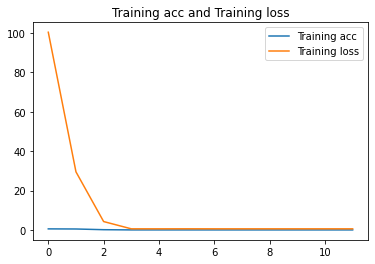

<Figure size 432x288 with 0 Axes>

160/160 [==============================] - 0s 1ms/step - loss: 0.5468 - auc_1: 0.7638 - accuracy: 1.9543e-04 - precision_1: 0.7637 - recall_1: 0.7637


[0.5468063354492188,
 0.7637749314308167,
 0.00019542701193131506,
 0.7637287378311157,
 0.7637287378311157]

In [42]:
model5 = model_five(X_train_nn1,y_train_nn1)
model5.evaluate(X_val_nn1,y_val_nn1)
#model5.evaluate(X_test_nn1,y_test_nn1)
#model5.summary()

##### model summary

In [0]:
models =[model1,model2, model3, model4, model5]
for model in models:
    print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               4400      
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 202       
Total params: 4,602
Trainable params: 4,602
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                2816      
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 130       
Total params: 2,946
Train

### Preliminary conclusions on your models

Include some graphs and peformance metrics

In [0]:
model1_accuracy = 0.7592
model2_accuracy = 0.7592
model3_accuracy = 0.2408
model4_accuracy = 0.7603
model5_accuracy = 0.7602

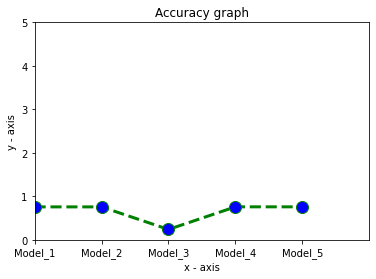

In [0]:
import matplotlib.pyplot as plt 
  
# x axis values 
x = ['Model_1','Model_2','Model_3','Model_4','Model_5'] 
# corresponding y axis values 
y = [0.7592,0.7592,0.2408,0.7603,0.7602] 
  
# plotting the points  
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
  
# setting x and y axis range 
plt.ylim(0,5) 
plt.xlim(0,5) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Accuracy graph') 
  
# function to show the plot 
plt.show() 

Model_3 as very less accuracy only 24% compared to other 3 models 

## Part 4: Cross-validation
We really should have used k-fold (eg. k=5) crossvalidation here, to not only evaluate our five keras/tensorflow models. See how your preliminary results change. Now that we have validation results with uncertainy (+- standard deviation), do your prior conclusion change. 

In [0]:
X_val_nn.shape
y_val_nn.shape
y_train_nn1.shape
X_train_nn1.shape

(25582, 43)

In [0]:
#len(X_np)

In [0]:
from sklearn.model_selection import KFold

#X_np = np.array(X)
X_np = np.asarray(X).astype(np.float32)
y_nn = pd.get_dummies(data = y)
#y_np = np.array(y_nn)
y_np = np.asarray(y_nn).astype(np.float32)

kf = KFold(n_splits = 5, random_state=None, shuffle=True)
for train_index, test_index in kf.split(X_np):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_nn1,x_test_nn1=X_np[train_index],X_np[test_index]
    y_train_nn1,y_test_nn1=y_np[train_index],y_np[test_index]
    #model 1
    print('model 1')
    model_cv1 = model_one(x_train_nn1,y_train_nn1)
    print(model_cv1.evaluate(x_test_nn1,y_test_nn1))
    
    # model 2
    print('model 2')
    model_cv2 = model_two(x_train_nn1,y_train_nn1)
    print(model_cv2.evaluate(x_test_nn1,y_test_nn1))
    
    #model 3
    print('model 3')
    model_cv3 = model_three(x_train_nn1,y_train_nn1)
    print(model_cv3.evaluate(x_test_nn1,y_test_nn1))
    
    #model 4
    print('model 4')
    model_cv4 = model_four(x_train_nn1,y_train_nn1)
    print(model_cv4.evaluate(x_test_nn1,y_test_nn1))
    
    #model 5
    print('model 5')
    model_cv5 = model_five(x_train_nn1,y_train_nn1)
    print(model_cv5.evaluate(x_test_nn1,y_test_nn1))

TRAIN: [    0     1     2 ... 31975 31976 31977] TEST: [    3    11    14 ... 31962 31969 31973]
model 1
Epoch 1/5
2047/2047 [==============================] - 6s 3ms/step - loss: 11.2706 - auc_1: 0.2934 - accuracy: 0.2023 - precision_1: 0.3830 - recall_1: 0.3830 - val_loss: 11.5995 - val_auc_1: 0.2437 - val_accuracy: 0.2437 - val_precision_1: 0.2437 - val_recall_1: 0.2437
Epoch 2/5
2047/2047 [==============================] - 5s 2ms/step - loss: 11.6671 - auc_1: 0.2393 - accuracy: 0.2393 - precision_1: 0.2393 - recall_1: 0.2393 - val_loss: 11.5995 - val_auc_1: 0.2437 - val_accuracy: 0.2437 - val_precision_1: 0.2437 - val_recall_1: 0.2437
Epoch 3/5
2047/2047 [==============================] - 4s 2ms/step - loss: 11.6671 - auc_1: 0.2393 - accuracy: 0.2393 - precision_1: 0.2393 - recall_1: 0.2393 - val_loss: 11.5995 - val_auc_1: 0.2437 - val_accuracy: 0.2437 - val_precision_1: 0.2437 - val_recall_1: 0.2437
Epoch 4/5
2047/2047 [==============================] - 4s 2ms/step - loss: 11.6671

In [0]:
y_test_nn1[0].shape

(6396, 2)

### Fill in your Part 4 Conclusion here 

Explain what you conclude on your models comparing preliminary results to those after cross-validation

Ussing k= 5 and runnig it on all the five models the accuracy rate has improved
but we try using regularization to improve the learning rate

## Part 5: Refining with Regularization

We know that our biggest problem, if our models are flexibile enough, will be overfitting. Please try to regularize your best 2 models to see if you can improve their results. Look at these questions:

* Try regularizing each of your two best models, does the generalizability increase?  of Decrease?  
* Is one more sensitive than the other? Why might this happen and why?  
* Please try this with all of your features and then with the reduced set of features.  
* Report your precision, recall and f1 score on the train and validation sets (no cross validatio yet).  
* Next carry out cross validation.  Does regularization reduce under or overfitting?   Why or why not?  

** Hint: Try both L1 or L2 norm for regularization or dropout **


In [41]:
print(X_train_nn1.shape)
print(y_train_nn1.shape)

(25582, 43)
(25582, 2)


* Since my model_1 and model_2  have performed well so I am using them in regualarization 

#### L2 regularization 

In [0]:
# Fill in your code analysis for part 5 here
from tensorflow.keras import regularizers

from keras import backend as K

def recall_m(y_val, y_pred):
    true_positives = K.sum(K.round(K.clip(y_val * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_val, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_val, y_pred):
    true_positives = K.sum(K.round(K.clip(y_val * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_val, y_pred):
    precision = precision_m(y_val, y_pred)
    recall = recall_m(y_val, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def model_one_L2(X_train_nn1,y_train_nn1):
    model_1_L2 = Sequential()
    model_1_L2.add(Dense(100,input_dim=43,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model_1_L2.add(Dense(2, activation='softmax'))
    model_1_L2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
    history = model_1_L2.fit(X_train_nn1,y_train_nn1, validation_split= 0.2,epochs=5,batch_size=32)
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='Training acc')
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    loss, accuracy, f1_score, precision, recall = model_1_L2.evaluate(X_test_nn1, y_test_nn1, verbose=0)
    print("loss",loss)
    print("accuracy",accuracy)
    print("f1_score",f1_score)
    print("precision",precision)
    print("recall",recall)
    return model_1_L2


def model_two_L2(X_train_nn1,y_train_nn1):
    model_2_L2 = Sequential()
    model_2_L2.add(Dense(64,input_dim=43,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model_2_L2.add(Dense(2, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
    model_2_L2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
    history = model_2_L2.fit(X_train_nn1,y_train_nn1, validation_split= 0.2,epochs=5,batch_size=32)
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='Training acc')
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    loss, accuracy, f1_score, precision, recall = model_2_L2.evaluate(X_test_nn1, y_test_nn1, verbose=0)
    print("loss",loss)
    print("accuracy",accuracy)
    print("f1_score",f1_score)
    print("precision",precision)
    print("recall",recall)
    return model_2_L2


##### L2 regularation on model 1 and model 2

Epoch 1/5
640/640 [==============================] - 1s 2ms/step - loss: 10.1168 - acc: 0.3407 - f1_m: 0.3410 - precision_m: 0.3410 - recall_m: 0.3410 - val_loss: 3.7496 - val_acc: 0.7555 - val_f1_m: 0.7556 - val_precision_m: 0.7556 - val_recall_m: 0.7556
Epoch 2/5
640/640 [==============================] - 1s 2ms/step - loss: 3.6752 - acc: 0.7604 - f1_m: 0.7605 - precision_m: 0.7605 - recall_m: 0.7605 - val_loss: 3.7496 - val_acc: 0.7555 - val_f1_m: 0.7556 - val_precision_m: 0.7556 - val_recall_m: 0.7556
Epoch 3/5
640/640 [==============================] - 1s 2ms/step - loss: 3.6752 - acc: 0.7604 - f1_m: 0.7603 - precision_m: 0.7603 - recall_m: 0.7603 - val_loss: 3.7496 - val_acc: 0.7555 - val_f1_m: 0.7556 - val_precision_m: 0.7556 - val_recall_m: 0.7556
Epoch 4/5
640/640 [==============================] - 1s 2ms/step - loss: 3.6752 - acc: 0.7604 - f1_m: 0.7603 - precision_m: 0.7603 - recall_m: 0.7603 - val_loss: 3.7496 - val_acc: 0.7555 - val_f1_m: 0.7556 - val_precision_m: 0.7556 - 

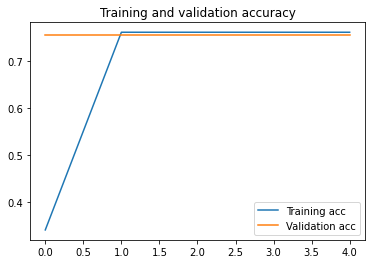

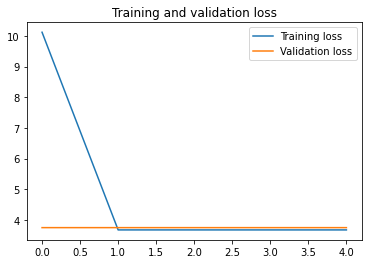

loss 3.6928112506866455
accuracy 0.759224534034729
f1_score 0.759263277053833
precision 0.7592633962631226
recall 0.7592633962631226
L2 regularize for model_one
160/160 [==============================] - 0s 999us/step - loss: 3.6267 - acc: 0.7635 - f1_m: 0.7635 - precision_m: 0.7635 - recall_m: 0.7635
[3.626727819442749, 0.7635332942008972, 0.7634899616241455, 0.7634900212287903, 0.7634900212287903]
200/200 [==============================] - 0s 1ms/step - loss: 3.6928 - acc: 0.7592 - f1_m: 0.7593 - precision_m: 0.7593 - recall_m: 0.7593
[3.6928112506866455, 0.759224534034729, 0.759263277053833, 0.7592633962631226, 0.7592633962631226]


In [63]:
model_1_L2= model_one_L2(X_train_nn1,y_train_nn1)
print("L2 regularize for model_one")
#y_pred_val_1_l2 = model_1_L2.predict(X_val_nn1)
#y_pred_test_1_l2 = model_1_L2.predict(X_test_nn1)
print(model_1_L2.evaluate(X_val_nn1,y_val_nn1))
print(model_1_L2.evaluate(X_test_nn1,y_test_nn1))


Epoch 1/5
640/640 [==============================] - 1s 2ms/step - loss: 7.9336 - acc: 0.4831 - f1_m: 0.4834 - precision_m: 0.4834 - recall_m: 0.4834 - val_loss: 3.7496 - val_acc: 0.7555 - val_f1_m: 0.7556 - val_precision_m: 0.7556 - val_recall_m: 0.7556
Epoch 2/5
640/640 [==============================] - 1s 2ms/step - loss: 3.6752 - acc: 0.7604 - f1_m: 0.7602 - precision_m: 0.7602 - recall_m: 0.7602 - val_loss: 3.7496 - val_acc: 0.7555 - val_f1_m: 0.7556 - val_precision_m: 0.7556 - val_recall_m: 0.7556
Epoch 3/5
640/640 [==============================] - 1s 2ms/step - loss: 3.6752 - acc: 0.7604 - f1_m: 0.7605 - precision_m: 0.7605 - recall_m: 0.7605 - val_loss: 3.7496 - val_acc: 0.7555 - val_f1_m: 0.7556 - val_precision_m: 0.7556 - val_recall_m: 0.7556
Epoch 4/5
640/640 [==============================] - 1s 2ms/step - loss: 3.6752 - acc: 0.7604 - f1_m: 0.7603 - precision_m: 0.7603 - recall_m: 0.7603 - val_loss: 3.7496 - val_acc: 0.7555 - val_f1_m: 0.7556 - val_precision_m: 0.7556 - v

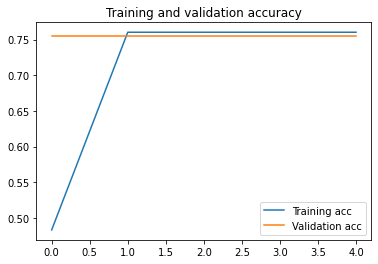

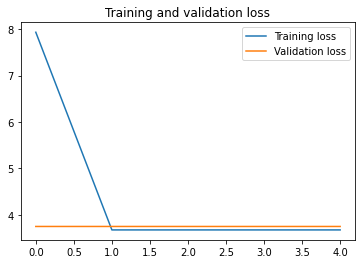

loss 3.6928138732910156
accuracy 0.759224534034729
f1_score 0.759263277053833
precision 0.7592633962631226
recall 0.7592633962631226
L2 regularize for model_two
160/160 [==============================] - 0s 1ms/step - loss: 3.6267 - acc: 0.7635 - f1_m: 0.7635 - precision_m: 0.7635 - recall_m: 0.7635
[3.6267316341400146, 0.7635332942008972, 0.7634899616241455, 0.7634900212287903, 0.7634900212287903]
200/200 [==============================] - 0s 1ms/step - loss: 3.6928 - acc: 0.7592 - f1_m: 0.7593 - precision_m: 0.7593 - recall_m: 0.7593
[3.6928138732910156, 0.759224534034729, 0.759263277053833, 0.7592633962631226, 0.7592633962631226]


In [60]:
model_2_L2= model_two_L2(X_train_nn1,y_train_nn1)
print("L2 regularize for model_two")
#y_pred_val_2_l2 = model_2_L2.predict(X_val_nn1)
#y_pred_test_2_l2 = model_2_L2.predict(X_test_nn1)
print(model_2_L2.evaluate(X_val_nn1,y_val_nn1))
print(model_2_L2.evaluate(X_test_nn1,y_test_nn1))


compare to previous model using cross validation the learring rate and model have improve using regularization 



###### L1 regularization on model 1 and model2 

In [0]:
## Laso method L1
def recall_m(y_val, y_pred):
    true_positives = K.sum(K.round(K.clip(y_val * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_val, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_val, y_pred):
    true_positives = K.sum(K.round(K.clip(y_val * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_val, y_pred):
    precision = precision_m(y_val, y_pred)
    recall = recall_m(y_val, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def model_one_L1(X_train_nn1,y_train_nn1):
    model_1_L1 = Sequential()
    model_1_L1.add(Dense(100,input_dim=43,activation='relu',kernel_regularizer=regularizers.l1(0.001)))
    model_1_L1.add(Dense(2, activation='softmax',kernel_regularizer=regularizers.l1(0.001)))
    model_1_L1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
    history = model_1_L1.fit(X_train_nn1,y_train_nn1, validation_split= 0.2,epochs=5,batch_size=10)
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='Training acc')
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    loss, accuracy, f1_score, precision, recall = model_1_L1.evaluate(X_test_nn1, y_test_nn1, verbose=0)
    print("loss",loss)
    print("accuracy",accuracy)
    print("f1_score",f1_score)
    print("precision",precision)
    print("recall",recall)
    return model_1_L1


def model_two_L1(X_train_nn1,y_train_nn1):
    model_2_L1 = Sequential()
    model_2_L1.add(Dense(64,input_dim=43,activation='relu'))
    model_2_L1.add(Flatten())
    model_2_L1.add(Dense(2, activation='softmax',kernel_regularizer=regularizers.l1(0.001)))
    model_2_L1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
    history = model_2_L1.fit(X_train_nn1,y_train_nn1, validation_split= 0.2,epochs=5,batch_size=10)
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='Training acc')
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    loss, accuracy, f1_score, precision, recall = model_2_L1.evaluate(X_test_nn1, y_test_nn1, verbose=0)
    print("loss",loss)
    print("accuracy",accuracy)
    print("f1_score",f1_score)
    print("precision",precision)
    print("recall",recall)
    return model_2_L1


Epoch 1/5
2047/2047 [==============================] - 4s 2ms/step - loss: 4.3608 - acc: 0.7168 - f1_m: 0.7168 - precision_m: 0.7168 - recall_m: 0.7168 - val_loss: 3.7507 - val_acc: 0.7555 - val_f1_m: 0.7556 - val_precision_m: 0.7556 - val_recall_m: 0.7556
Epoch 2/5
2047/2047 [==============================] - 4s 2ms/step - loss: 3.6821 - acc: 0.7600 - f1_m: 0.7599 - precision_m: 0.7599 - recall_m: 0.7599 - val_loss: 3.7530 - val_acc: 0.7555 - val_f1_m: 0.7556 - val_precision_m: 0.7556 - val_recall_m: 0.7556
Epoch 3/5
2047/2047 [==============================] - 4s 2ms/step - loss: 3.6783 - acc: 0.7604 - f1_m: 0.7604 - precision_m: 0.7604 - recall_m: 0.7604 - val_loss: 3.7524 - val_acc: 0.7555 - val_f1_m: 0.7556 - val_precision_m: 0.7556 - val_recall_m: 0.7556
Epoch 4/5
2047/2047 [==============================] - 3s 2ms/step - loss: 3.6778 - acc: 0.7604 - f1_m: 0.7603 - precision_m: 0.7603 - recall_m: 0.7603 - val_loss: 3.7520 - val_acc: 0.7555 - val_f1_m: 0.7556 - val_precision_m: 0.

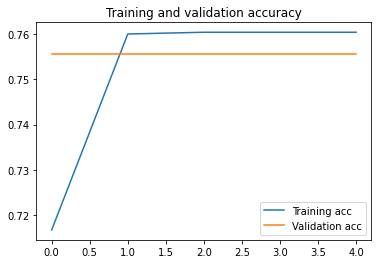

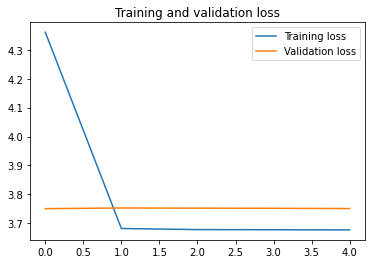

loss 3.6942226886749268
accuracy 0.759224534034729
f1_score 0.759263277053833
precision 0.7592633962631226
recall 0.7592633962631226
L1 regularize for model_one
160/160 [==============================] - 0s 1ms/step - loss: 3.6281 - acc: 0.7635 - f1_m: 0.7635 - precision_m: 0.7635 - recall_m: 0.7635
[3.6281394958496094, 0.7635332942008972, 0.7634899616241455, 0.7634900212287903, 0.7634900212287903]
200/200 [==============================] - 0s 1ms/step - loss: 3.6942 - acc: 0.7592 - f1_m: 0.7593 - precision_m: 0.7593 - recall_m: 0.7593
[3.6942226886749268, 0.759224534034729, 0.759263277053833, 0.7592633962631226, 0.7592633962631226]


In [51]:
model_1_L1= model_one_L1(X_train_nn1,y_train_nn1)
print("L1 regularize for model_one")
print(model_1_L1.evaluate(X_val_nn1,y_val_nn1))
print(model_1_L1.evaluate(X_test_nn1,y_test_nn1))


Epoch 1/5
2047/2047 [==============================] - 3s 2ms/step - loss: 3.9812 - acc: 0.7405 - f1_m: 0.7405 - precision_m: 0.7405 - recall_m: 0.7405 - val_loss: 3.7505 - val_acc: 0.7555 - val_f1_m: 0.7556 - val_precision_m: 0.7556 - val_recall_m: 0.7556
Epoch 2/5
2047/2047 [==============================] - 3s 2ms/step - loss: 3.6760 - acc: 0.7604 - f1_m: 0.7604 - precision_m: 0.7604 - recall_m: 0.7604 - val_loss: 3.7504 - val_acc: 0.7555 - val_f1_m: 0.7556 - val_precision_m: 0.7556 - val_recall_m: 0.7556
Epoch 3/5
2047/2047 [==============================] - 3s 2ms/step - loss: 3.6759 - acc: 0.7604 - f1_m: 0.7603 - precision_m: 0.7603 - recall_m: 0.7603 - val_loss: 3.7502 - val_acc: 0.7555 - val_f1_m: 0.7556 - val_precision_m: 0.7556 - val_recall_m: 0.7556
Epoch 4/5
2047/2047 [==============================] - 3s 2ms/step - loss: 3.6757 - acc: 0.7604 - f1_m: 0.7603 - precision_m: 0.7603 - recall_m: 0.7603 - val_loss: 3.7499 - val_acc: 0.7555 - val_f1_m: 0.7556 - val_precision_m: 0.

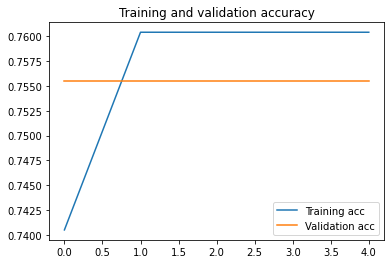

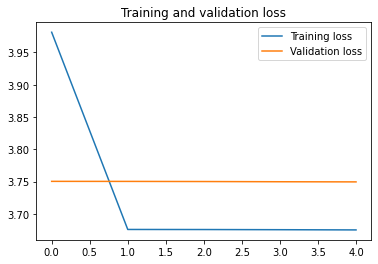

loss 3.6928369998931885
accuracy 0.759224534034729
f1_score 0.759263277053833
precision 0.7592633962631226
recall 0.7592633962631226
L1 regularize for model_two
160/160 [==============================] - 0s 1ms/step - loss: 3.6268 - acc: 0.7635 - f1_m: 0.7635 - precision_m: 0.7635 - recall_m: 0.7635
[3.6267504692077637, 0.7635332942008972, 0.7634899616241455, 0.7634900212287903, 0.7634900212287903]
200/200 [==============================] - 0s 980us/step - loss: 3.6928 - acc: 0.7592 - f1_m: 0.7593 - precision_m: 0.7593 - recall_m: 0.7593
[3.6928369998931885, 0.759224534034729, 0.759263277053833, 0.7592633962631226, 0.7592633962631226]


In [58]:
model_2_L1= model_two_L1(X_train_nn1,y_train_nn1)
print("L1 regularize for model_two")
print(model_2_L1.evaluate(X_val_nn1,y_val_nn1))
print(model_2_L1.evaluate(X_test_nn1,y_test_nn1))


### Fill in your part 5 conclusions here

Explain what you conclude from your regularization analysis.

* Both the model have also perforemd well in L1 regualrication   
* In this model 1 and model 2, model 1 has performed well laso Method L1  
* Hence we can conclude Regularization helps to improve the model better 

## Part 6: Grid Search

Please read this [article on using Grid Search CV with Keras](https://mlfromscratch.com/gridsearch-keras-sklearn). Be very very careful. Grid Search is very very slow. Given your above experiments you should have a pretty good idea of what your prameters should be before you run grid search. Run some small gridsearch runs (much smaller or more widely spaced) than you want to estimate time. Remember google colab will end after a limited amount of time so build slowly. Try to pin down the best parameters for:

1. The number of layers (please don't go deeper than 10 hidden layers)
2. The number of nodes per layer
3. The type of regularization to use
4. The type of weight initialization to use.
5. The type of activation function.
6. The metric to evaluate with, although logloss is standard, try using other metrics of accuracy.  

You may even try multiple and averaging or taking the harmonic weight of multiple metrics.

In [0]:
x_train_data =X_train_nn1.copy()
y_train_data =y_train_nn1.copy()

In [0]:
### from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
def create_model_GS():
    model = Sequential()
    model.add(Dense(10,input_dim=43,activation='relu'))
    model.add(Dense(2, activation='softmax',))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["acc"])
    model.fit(x_train_data,y_train_data, validation_split= 0.2,epochs=5,batch_size=10)
    return model

 
model = KerasClassifier(build_fn=create_model_GS, epochs=3)

with epoch 1,2,3

In [0]:
param_grid = dict(epochs=[1,2,3])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train_data,y_train_data)

Epoch 1/5
2047/2047 [==============================] - 4s 2ms/step - loss: 11.6814 - acc: 0.2384 - val_loss: 11.6025 - val_acc: 0.2435
Epoch 2/5
2047/2047 [==============================] - 4s 2ms/step - loss: 11.6814 - acc: 0.2384 - val_loss: 11.6025 - val_acc: 0.2435
Epoch 3/5
2047/2047 [==============================] - 4s 2ms/step - loss: 11.6814 - acc: 0.2384 - val_loss: 11.6025 - val_acc: 0.2435
Epoch 4/5
2047/2047 [==============================] - 4s 2ms/step - loss: 11.6814 - acc: 0.2384 - val_loss: 11.6025 - val_acc: 0.2435
Epoch 5/5
800/800 [==============================] - 1s 2ms/step - loss: 11.6656 - acc: 0.2394


In [0]:
# summarize results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("mean %f stdev (%f) with %r" % (mean, stdev, param))

mean 0.759519 stdev (0.001574) with {'epochs': 1}
mean 0.409728 stdev (0.245676) with {'epochs': 2}
mean 0.412073 stdev (0.244092) with {'epochs': 3}


with epochs 2,5, 7

In [0]:
param_grid = dict(epochs=[2,5,7])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train_data,y_train_data)

Epoch 1/5
2047/2047 [==============================] - 4s 2ms/step - loss: 11.6619 - acc: 0.2396 - val_loss: 11.5875 - val_acc: 0.2445
Epoch 2/5
2047/2047 [==============================] - 4s 2ms/step - loss: 11.6619 - acc: 0.2396 - val_loss: 11.5875 - val_acc: 0.2445
Epoch 3/5
2047/2047 [==============================] - 4s 2ms/step - loss: 11.6619 - acc: 0.2396 - val_loss: 11.5875 - val_acc: 0.2445
Epoch 4/5
2047/2047 [==============================] - 4s 2ms/step - loss: 11.6619 - acc: 0.2396 - val_loss: 11.5875 - val_acc: 0.2445
Epoch 5/5
2047/2047 [==============================] - 4s 2ms/step - loss: 11.6619 - acc: 0.2396 - val_loss: 11.5875 - val_acc: 0.2445
Epoch 1/7
800/800 [==============================] - 1s 2ms/step - loss: 11.6470 - acc: 0.2406
Epoch 2/7
800/800 [==============================] - 1s 2ms/step - loss: 11.6470 - acc: 0.2406
Epoch 3/7
800/800 [==============================] - 1s 1ms/step - loss: 11.6470 - acc: 0.2406
Epoch 4/7
800/800 [=====================

In [0]:
# summarize results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("mean %f stdev %f  with  %r" % (mean, stdev, param))

mean 0.414830 stdev 0.245027  with  {'epochs': 2}
mean 0.592266 stdev 0.247148  with  {'epochs': 5}
mean 0.759440 stdev 0.001770  with  {'epochs': 7}


### Put your grid search conclusion for part 6 here

In grid search model has perforemd well the epoch7 

## Overall Conclusion

Conclude with a full report here on what we know now about this problem. How well it does verses baseline, what the best Keras archtecture is, what features should be used, how the data should be cleaned etc.

* Logistive regression and random forest have perforemd well with 82% accuracy comapred to nwural network 
* due the Class imblance problem more issue in learning rate
* After all doing cross validation, regularization the model is improve to 76% accuracy, hence ML algrothim like logistive regressin, svm, random forest we perfrom better  